<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/final_EDA_hostile%2Cnonhostile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [162]:
# dataset_Name='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset - Sheet1 (1).csv'
dataset_Name='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset - Hostility_Dataset_main_suffeld.csv'
df = pd.read_csv(dataset_Name)
df=df.dropna()
df.head()


,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0


In [163]:
print( df.dtypes)

id                      int64
Text                   object
Hostile/Non-Hostile     int64
offensive               int64
Hate speech             int64
threat                  int64
defamation              int64
sarcasm                 int64
dtype: object


In [164]:
df.isnull().values.any()

False

In [165]:
print("Total number of Text extracted from dataset are =",len(df))

Total number of Text extracted from dataset are = 10535


In [166]:
print('Average Text length: ', df.Text.str.split().str.len().mean())
print('Stdev Text length: ', df.Text.str.split().str.len().std())

Average Text length:  13.081822496440436
Stdev Text length:  12.066305758990934


In [167]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [168]:
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10530,10121,হ্যাপি জদি রাজি থাকে আমি বিয়া করতে রাজি আছি প্...,0,0,0,0,0,0
10531,4641,হ্যেকার গ্রুপ কি ওর মায়্রপ চুদতে চাইসিলো,1,1,0,0,1,0
10532,7444,হ্লাত প্রতিবন্ধী হয়ে গেছে! ওরে কেউ এক সামুচ গু...,1,1,0,0,0,1
10533,7495,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত?,1,1,0,0,0,1


In [169]:
with open(dataset_Name, 'r') as f:
    contents = f.read()
    words = contents.split()
    num_words = len(words)
print("Total number of words in the dataset:", num_words)

with open(dataset_Name, 'r') as f:
    contents = f.read()
    words = contents.split()
    unique_words = set(words)
    num_unique_words = len(unique_words)
print("Total number of unique words in the dataset:", num_unique_words)

import os
size_bytes = os.path.getsize(dataset_Name)
size_mb = size_bytes / (1024 * 1024)
print("Size of the dataset in MB:", size_mb)


Total number of words in the dataset: 138200
Total number of unique words in the dataset: 42651
Size of the dataset in MB: 2.1530046463012695


In [170]:
cols = df.columns
cols = list(df.columns)
classes = cols[2:8]
num_labels = len(classes)
print('Mesh Labels Root Class: "\n"',classes)
print("\n")
print('Number of Labels: ' ,num_labels)

Mesh Labels Root Class: "
" ['Hostile/Non-Hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']


Number of Labels:  6


**Dataset Statistics**


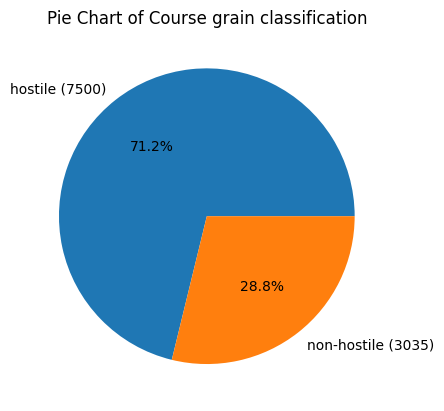

In [171]:
import matplotlib.pyplot as plt

# Select the column for which you want to create a pie chart
column_data = df['Hostile/Non-Hostile']

# Replace the labels
label_map = {1: 'hostile', 0: 'non-hostile'}
column_data = column_data.map(label_map)

# Count the frequency of each value in the column
value_counts = column_data.value_counts()

# Create a list of labels with count values
labels = []
for label in value_counts.index:
    count = value_counts[label]
    label_text = f'{label} ({count})'
    labels.append(label_text)

# Create a pie chart with custom labels
plt.pie(value_counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Pie Chart of Course grain classification')

# Display the chart
plt.show()

In [172]:
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in classes:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number of text'])
  return stats

In [173]:
stats = single_class_post_distribution(df,classes)
stats

,class,number of text
0,Hostile/Non-Hostile,7500
1,offensive,3530
2,Hate speech,2550
3,threat,1445
4,defamation,2355
5,sarcasm,2166


Text(0.5, 0, 'Classes')

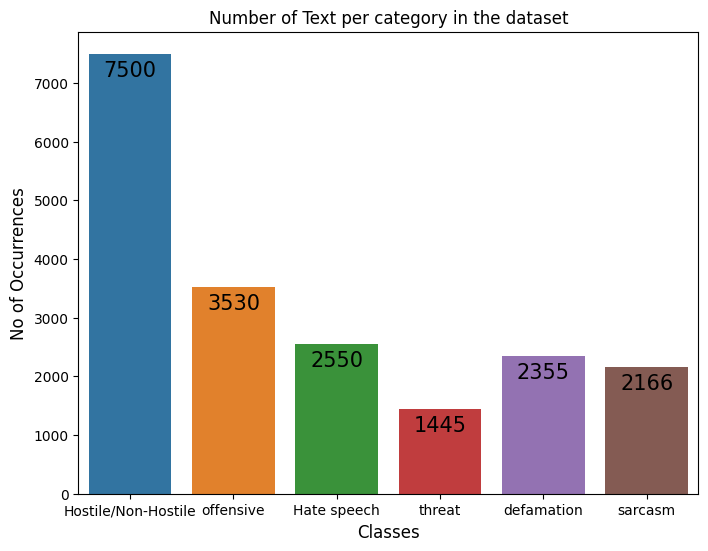

In [174]:
# Barplot
import seaborn as sns
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number of text',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of Text per category in the dataset")
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

In [175]:
labelss = cols[3:8]
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in labelss:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number of text'])
  return stats

stats = single_class_post_distribution(df,classes)
# stats['key3'] = 'value3'

# Append the new dictionary element to the list
stats.loc[5,'class'] = 'Non-hostile'
stats.loc[5,'number of text'] = 3035

stats
print(type(stats))


<class 'pandas.core.frame.DataFrame'>


In [176]:
stats

,class,number of text
0,offensive,3530.0
1,Hate speech,2550.0
2,threat,1445.0
3,defamation,2355.0
4,sarcasm,2166.0
5,Non-hostile,3035.0


Text(0.5, 0, 'Classes')

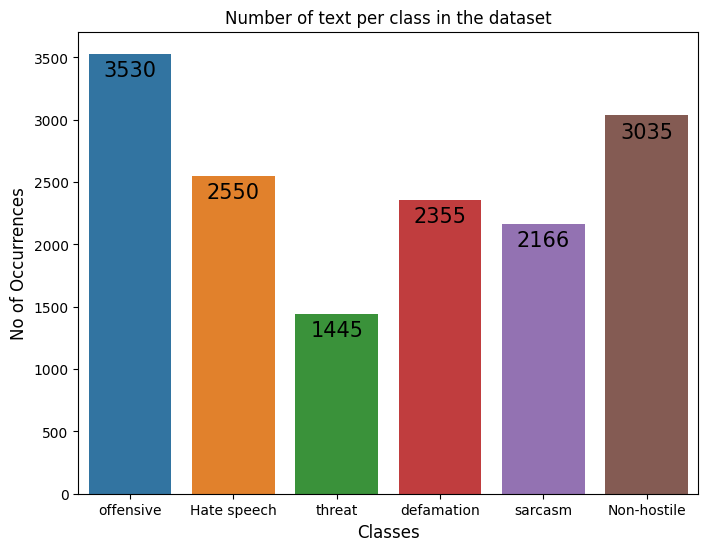

In [177]:
# Barplot
import seaborn as sns
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number of text',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of text per class in the dataset")
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

**How many posts have multiple category ?**


In [178]:

def posts_with_multilabel (dataset,label):
  rowsums = dataset.iloc[:,1:8].sum(axis=1)
  x=rowsums.value_counts()
  df = pd.DataFrame(x.values,columns = ['number_of_posts'])
  #plot
  plt.figure(figsize=(8,6))
  splot = sns.barplot(x = df.index, y= 'number_of_posts',data = df)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '1.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.title(f"Multiple class per post ({label} Set)")
  plt.ylabel('No of Occurrences', fontsize=12)
  plt.xlabel('No of classes', fontsize=12)

<ipython-input-178-672da550c76e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowsums = dataset.iloc[:,1:8].sum(axis=1)


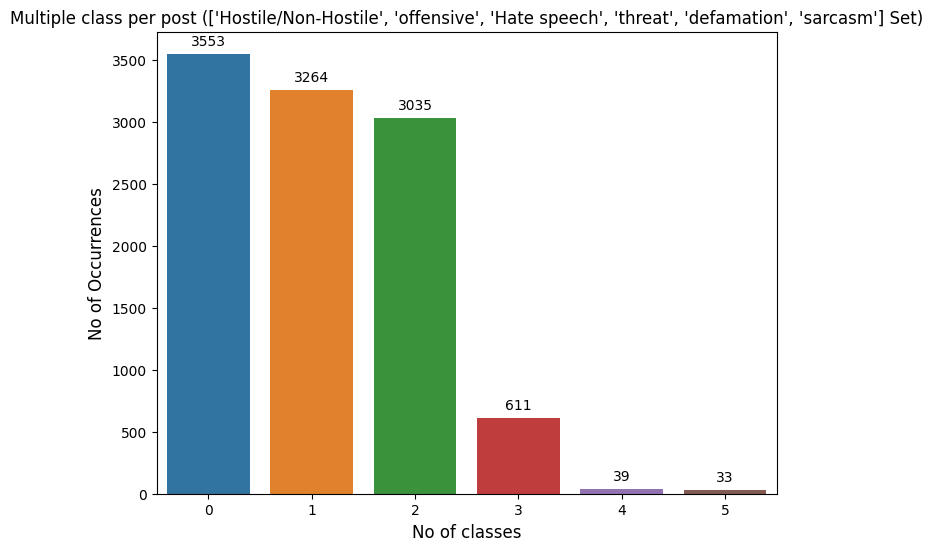

In [179]:
posts_with_multilabel (df,classes)

**Number of comments classified as classes depending on their lengths**

In [180]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Hostile/Non-Hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']]
  label = label.values
  comment = dataset['Text']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix])
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
      if label[ix][2] :
          y[ix][2] = l
      if label[ix][3] :
          y[ix][3] = l
      if label[ix][4] :
          y[ix][4] = l
      if label[ix][5] :
          y[ix][5] = l

  labelsplt = classes
  color = ['green','red','blue','yellow','chartreuse','orange']    
  bins = [1,50,100,150,200,250,300,350,400,450,500,550,600]    
  plt.title (f'Comments Length Per Class ({set_name} Set)')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 450, 0, 3300])
  plt.xlabel('Length of Text')
  plt.ylabel('Number of Text') 
  plt.legend()
  plt.grid(True)
  plt.show()

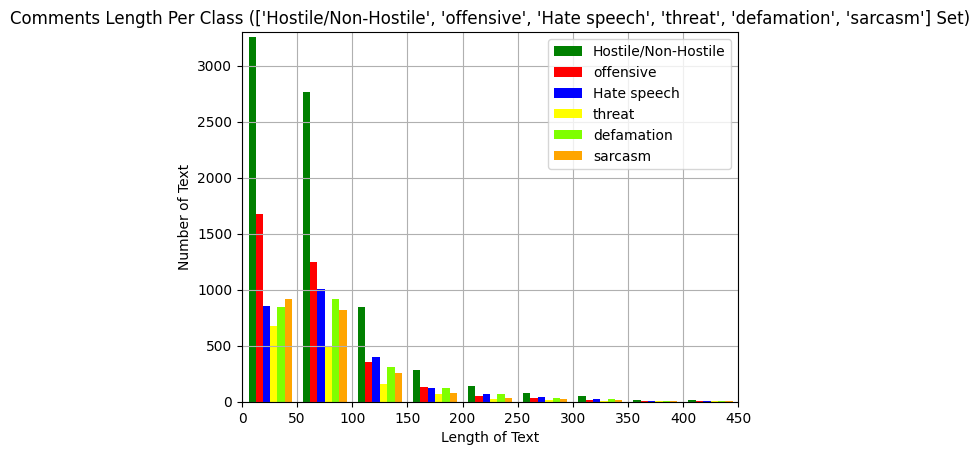

In [181]:
comments_length_per_class(df,classes)

In [182]:
import numpy as np
import matplotlib.pyplot as plt

def comments_length_binary(dataset, set_name):
    # Get the labels and comments from the dataset
    labels = dataset['Hostile/Non-Hostile']
    comments = dataset['Text']
    
    # Create empty arrays to store the length of comments for each class
    non_hostile_lengths = []
    hostile_lengths = []
    
    # Iterate over all comments and their labels
    for comment, label in zip(comments, labels):
        # Calculate the length of the comment
        length = len(comment)
        
        # Append the length to the appropriate array based on the label
        if label == 0:
            non_hostile_lengths.append(length)
        else:
            hostile_lengths.append(length)
    
    # Create the histogram with 20 bins
    num_bins =[1,50,100,150,200,250,300,350,400,450,500,550,600]   
    plt.hist([ hostile_lengths,non_hostile_lengths], bins=num_bins, color=['blue', 'red'], label=['Non-Hostile', 'Hostile'])
    
    # Set the x-axis and y-axis labels, and the title of the plot
    plt.xlabel('Text Length')
    plt.ylabel('Number of Text')
    plt.title(f'Comment Lengths for Binary Classification ({set_name} set)')
    
    plt.axis([0, 500, 0, 4500])
    
    # Add a legend and grid to the plot, and show it
    plt.legend()
    plt.grid(True)
    plt.show()


In [183]:
# label=['Hostile/Non-Hostile']
# comments_length_binary(df,label )

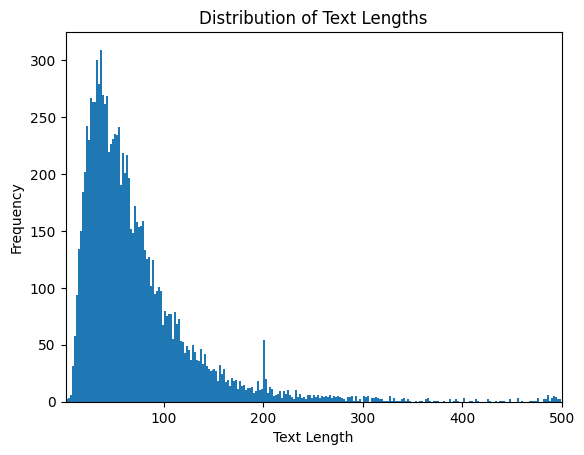

In [184]:
import matplotlib.pyplot as plt

# Calculate the length of each text in a column
text_lengths = df['Text'].apply(len)

# Set the number of bins to 500
num_bins = 1000



# Determine the range of text lengths
max_length = text_lengths.max()
min_length = text_lengths.min()

# Calculate the bin width
bin_width = (max_length - min_length) / num_bins

# Create a histogram of text lengths with 500 bins
plt.hist(text_lengths, bins=num_bins)
plt.xlim(1, 500)

# Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Display the chart
plt.show()


In [185]:
stp_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/bd_stopword.txt'
stp = open(stp_path,'r',encoding='utf-8').read().split()

In [186]:
'''
Text Cleaning
'''
from bs4 import BeautifulSoup
import re,nltk,json
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
def text_cleaning(row):
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  # post = re.sub(r'[^\x00-\x7F]+|[\W]', '', text)
  post = post.replace('—', ' ') 
  post = post.replace('।', ' ')
  text = ''.join([c for c in post if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # # Stopword 
  # result = text.split()
  # text = [word.strip() for word in result if word not in stp ]
  # text =" ".join(text)
  
  return text

In [187]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



In [188]:

#Removing punctuations

df['cleaned'] = df['Text'].apply(remove_emojis)
df['cleaned'] = df['Text'].apply(text_cleaning)

## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(100):
  print("Original Data:===\n",df.Text[i],"\nCleaned Data:===\n",df.cleaned[i],)

<ipython-input-186-d33acfc8d95a>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(row, 'html.parser').get_text()


Data samples after cleaning:

Original Data:===
   এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের সাধিনতার নাম করে লোভ দেখিয়ে মগজ ধোলাই করে ঘর থেকে বের করে কোউসলে সব কিছু লুট করে নিয়ে যাচ্চে। লুচ্চা শিয়ালদের কথা সব সময় মেয়েদের ভালো লাগে আর আমরা ইসলামিক কিছু বললেই তাদের চোখে চিরো শত্রু হয়ে যাই। আরে ভাই লাগাম ছাড়া হলে কে ঠিক থাকে বলেন। মেয়েদের কে ইসলামে কেনো ঘরে থেকে ঘরয়া কাজ করতে বলা হয়েছে খুব প্রয়জন না হলে বাহিরে গিয়ে কাজ করায় নিতি নিরধারন করেছে এবং কঠিন রুলস দিয়েছে একটা ভালো মেয়েও বেটার সংগে থাকলে খারাপ হতে বাদ্ধ হবে আর এখনকার সমাজ এই দিকেই আগাচ্ছে। নারীবাদি ফেমিনিস্টরা মেয়েদের ব্রেন ওয়াস করছে তাদের বানাচ্ছে অঘসিতো পতিতা । এখনকার জুগের মেয়েরা কাজের নামে একটু আরাল হলেই আকাম করে বেরাচ্ছে ঠোকাচ্চে নিজের সামি কে নিজের পরিবারকে। এটা কি কখনো কাম্মো পুরুশ দোস তো আছেই কিন্তু তারের ঠিক করার থেকে নিজের সাবধানতা বড় আসল কথা নিজের নিয়ত খারাপ হলে অপর মানুসের দোস দিয়ে কি লাভ। এই মেয়ের ইচ্চাই ছিলো ওই বেটাকে পটিয়ে চূদা খাওয়া বিনিমতে টাকা নেওয়া। কনো যদি এই বাজে নিয়ত থাকে তবে এই দিকে তাদের আগাতে বা সফল হতে

In [189]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())

labels = ['Hostile/Non-Hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']
# Count number of unique words in each set
def dataset_statistics(dataset):
    for l in labels:
        word_list = [word.strip() for t in list(dataset.loc[dataset[l] == 1, 'cleaned']) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        print(f"\nClass Name:--> {l} ") 
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Maximum Caption length: {}".format(max(dataset.loc[dataset[l] == 1, 'cleaned'].apply(char_length))))
        print("Minimum Caption length: {}".format(min(dataset.loc[dataset[l] == 1, 'cleaned'].apply(char_length))))
        print("Average Words in texts: {}".format(np.mean(dataset.loc[dataset[l] == 1, 'cleaned'].apply(char_length))))
        print(color.BOLD+"\nMost Frequent Words:\n"+color.END)
        for k,v in ordered[:100]:
            print("{}   {}".format(k,v))


In [190]:
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,cleaned
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের সা...
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0,একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ভাব...
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1,আজকের এই পবিত্র দিনে তোরে গালি দিলাম না ঈদটা য...
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0,আজব একটা মানুষ তুমি দুঃখের গল্প বললেও তুমি কষ্...
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম
...,...,...,...,...,...,...,...,...,...
10530,10121,হ্যাপি জদি রাজি থাকে আমি বিয়া করতে রাজি আছি প্...,0,0,0,0,0,0,হ্যাপি জদি রাজি থাকে আমি বিয়া করতে রাজি আছি প্...
10531,4641,হ্যেকার গ্রুপ কি ওর মায়্রপ চুদতে চাইসিলো,1,1,0,0,1,0,হ্যেকার গ্রুপ কি ওর মায়্রপ চুদতে চাইসিলো
10532,7444,হ্লাত প্রতিবন্ধী হয়ে গেছে! ওরে কেউ এক সামুচ গু...,1,1,0,0,0,1,হ্লাত প্রতিবন্ধী হয়ে গেছে ওরে কেউ এক সামুচ গু দে
10533,7495,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত?,1,1,0,0,0,1,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত


In [191]:
df['cleaned'].isnull().values.any()

False

In [192]:
dataset_statistics(df)


Class Name:--> Hostile/Non-Hostile 
Number of Words:99655
Number of Unique Words:19239
Maximum Caption length: 331
Minimum Caption length: 0
Average Words in texts: 13.287333333333333

Most Frequent Words:

না   1542
এই   1181
করে   1057
আর   927
কি   774
কে   515
তোর   497
তো   465
ও   463
একটা   430
সব   424
হবে   412
যে   401
হয়   394
আছে   386
জন্য   376
কোন   364
এর   364
করা   345
কথা   342
তুই   340
থেকে   339
নাই   334
তার   322
বাচ্চা   302
করতে   298
মানুষ   294
আমি   292
সাথে   291
মনে   287
ভারত   284
আমার   281
কিছু   274
দিয়ে   274
এখন   258
বলে   255
খানকির   253
চাই   247
ভালো   245
হয়ে   243
হোক   242
ভারতের   239
কেন   231
পোলা   230
উচিত   221
আমাদের   219
ভাই   213
তাদের   212
এক   206
যদি   204
বিচার   200
দরকার   200
নিয়ে   196
তোদের   195
তাই   191
দেশের   191
করছে   190
আবার   190
আগে   190
এটা   187
দেশ   182
আমরা   181
এদের   180
কুত্তার   179
পারে   177
নেই   176
মত   176
দেশে   176
এ   174
এবং   171
অনেক   171
দেওয়া   171
মাগি   170
পুলিশ   169
তাহলে   168


**Zipf Curve(Frequency vs Rank)**

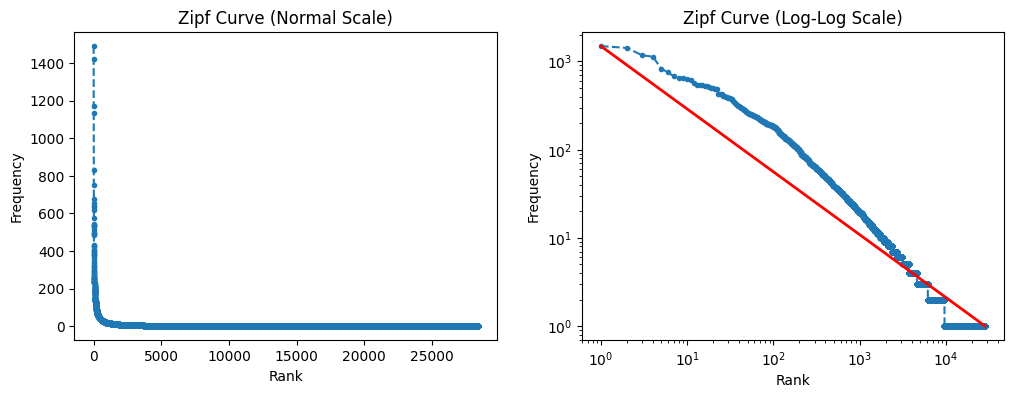

In [193]:
import matplotlib.pyplot as plt

# Calculate the word frequencies
word_counts = df['Text'].str.split(expand=True).stack().value_counts()

# Get the ranks
ranks = range(1, len(word_counts)+1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the Zipf curve on a normal scale
axs[0].plot(ranks, word_counts ,marker='o', linestyle='--', markersize=3)
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Zipf Curve (Normal Scale)')

# Plot the Zipf curve on a log-log scale
axs[1].loglog(ranks, word_counts,marker='o', linestyle='--', markersize=3)
axs[1].set_xlabel('Rank')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Zipf Curve (Log-Log Scale)')

max_x = max(ranks)
max_y = max(word_counts)
axs[1].plot([1, max_x], [max_y, 1], 'r', linewidth=2)

# Display the chart
plt.show()


**Word Density Vs average Density**


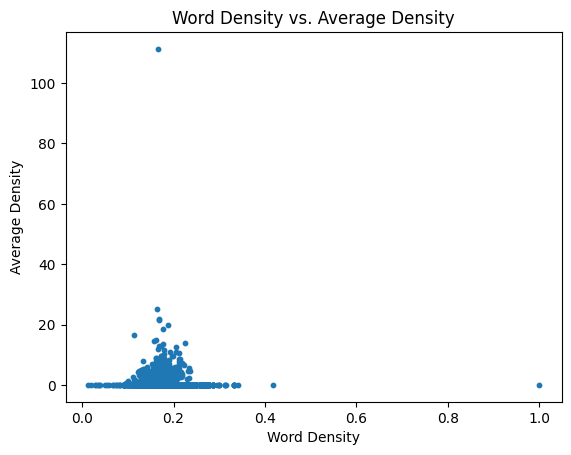

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the word density and average density for each row
df['Word Density'] = df['Text'].apply(lambda x: len(x.split()) / len(x) if len(x)>0 else 0)
df['Average Density'] = df['Text'].apply(lambda x: len(x.split()) / len(x.split('.')) if len(x)>0 and '.' in x else 0)

# Create a scatter plot of the data
plt.scatter(df['Word Density'], df['Average Density'], s=10)

# Add labels and title
plt.xlabel('Word Density')
plt.ylabel('Average Density')
plt.title('Word Density vs. Average Density')

# Display the plot
plt.show()

**Class wise density vs average density**

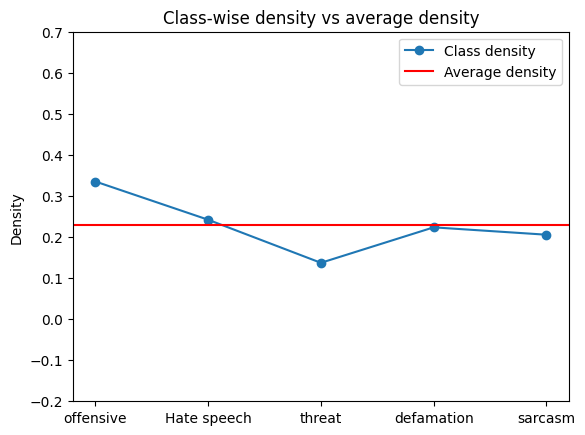

In [195]:
import pandas as pd
import numpy as np

# Load the dataset into a pandas dataframe


# Get the labels and the text data
labels = df.iloc[:, 3:8].values
text_data = df.iloc[:, 0].values

# Create a binary matrix Y where each row represents a sample and each column represents a class
Y = np.zeros((labels.shape[0], labels.shape[1]), dtype=int)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i,j] == 1:
            Y[i,j] = 1

# Compute the density of each class
class_densities = np.sum(Y, axis=0) / Y.shape[0]

# Compute the average density
avg_density = np.mean(class_densities)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(range(5), class_densities, '-o', label='Class density')
# plt.bar(range(6), class_densities)
plt.axhline(y=avg_density, color='r', label='Average density')
plt.xticks(range(5), ['offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm'])
plt.ylabel('Density')
plt.ylim(-.2, .7)
plt.title('Class-wise density vs average density')
plt.legend()
plt.show()


**Calculate Jaccard similarity index for the multi-label dataset**

In [196]:
import numpy as np

# Load the dataset into a pandas dataframe
# Assumes the labels are in columns 2-7 and the text data is in column 0
# Replace this with your own code to load the dataset

# Get the labels and the text data
labels = df.iloc[:, 2:8].values
text_data = df.iloc[:, 1].values.astype(str)

# Create a binary matrix Y where each row represents a sample and each column represents a class
Y = np.zeros((labels.shape[0], labels.shape[1]), dtype=int)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i,j] == 1:
            Y[i,j] = 1

# Count number of unique words in each label
final_list = []

for j in range(Y.shape[1]):
    label_wise_word_list = []
    for i in range(Y.shape[0]):
        if Y[i,j] == 1:
            words = text_data[i].split()
            label_wise_word_list.extend(words)
    counts = dict()
    for word in label_wise_word_list:
        counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list  
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    print(ordered)
    print(f"\nLabel: {j}")
    word_list = []
    for k,v in ordered[:400]:
        word_list.append(k)
    final_list.append(word_list)
    print(final_list)

# Calculate Jaccard similarity index for the multi-label multi-class dataset
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    if len(s1.union(s2)) == 0:
        return 0.0
    else:
        return float(len(s1.intersection(s2)) / len(s1.union(s2)))

similarity_matrix = np.zeros((Y.shape[1], Y.shape[1]))

for i in range(Y.shape[1]):
    for j in range(Y.shape[1]):
        if i != j:
            # print(final_list[i])
            # print(final_list[j])
            similarity_score = jaccard_similarity(final_list[i], final_list[j])
            similarity_matrix[i][j] = similarity_score
            print(f"Labels {i} and {j}: Jaccard similarity = {similarity_score}")


[('না', 1189), ('এই', 1168), ('করে', 948), ('আর', 897), ('কি', 724), ('কে', 497), ('তোর', 489), ('তো', 459), ('ও', 458), ('একটা', 423), ('সব', 421), ('যে', 388), ('কোন', 363), ('এর', 360), ('জন্য', 357), ('।', 340), ('করা', 336), ('তুই', 329), ('থেকে', 327), ('কথা', 321), ('তার', 317), ('হবে', 316), ('হয়', 316), ('আছে', 308), ('করতে', 292), ('সাথে', 290), ('আমি', 287), ('মনে', 286), ('মানুষ', 283), ('বাচ্চা', 278), ('আমার', 275), ('দিয়ে', 273), ('কিছু', 272), ('ভারত', 272), ('খানকির', 251), ('এখন', 243), ('হয়ে', 241), ('বলে', 239), ('ভালো', 238), ('নাই', 232), ('ভারতের', 231), ('আমাদের', 215), ('চাই', 211), ('তাদের', 208), ('যদি', 203), ('এক', 203), ('না।', 199), ('বিচার', 196), ('ভাই', 195), ('পোলা', 194), ('নিয়ে', 192), ('দেশের', 190), ('তোদের', 189), ('আবার', 186), ('আগে', 185), ('হোক', 183), ('এটা', 182), ('তাই', 182), ('কেন', 178), ('কুত্তার', 178), ('দেশ', 177), ('উচিত', 174), ('মত', 173), ('দেশে', 173), ('আমরা', 172), ('এদের', 172), ('এবং', 171), ('এ', 170), ('দেওয়া', 168), ('অন

In [197]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset into a pandas dataframe
# Assumes the labels are in column 1 and the text data is in column 0
# Replace this with your own code to load the dataset

# Get the labels and the text data
labels = df.iloc[:, 2].values.astype(int)
text_data = df.iloc[:, 1].values.astype(str)

# Separate the hostile and non-hostile data into two separate arrays
hostile_data = text_data[labels == 1]
non_hostile_data = text_data[labels == 0]

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(text_data)

# Calculate the cosine similarity between hostile and non-hostile data
hostile_indices = np.where(labels == 1)[0]
non_hostile_indices = np.where(labels == 0)[0]
hostile_vectors = vectorized_data[hostile_indices]
non_hostile_vectors = vectorized_data[non_hostile_indices]
similarity_matrix = cosine_similarity(hostile_vectors, non_hostile_vectors)

# Calculate the Jaccard similarity using the cosine similarity matrix
jaccard_similarity = np.mean(similarity_matrix > 0)

print("Jaccard similarity between hostile and non-hostile data:", jaccard_similarity)


Jaccard similarity between hostile and non-hostile data: 0.2023214058209775


**Calculation of kappa Value**

In [198]:
# read two dataset
# an1='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-1 - Sheet1.csv'
an1='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-1 - Sheet1 (2).csv'
an2='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-2 - Hostility_Dataset_main.csv'
an3='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-3 - Sheet1 (2).csv'
an1df = pd.read_csv(an1)
an2df=pd.read_csv(an2)
an3df=pd.read_csv(an3)

an1df.head(10)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,1,1,1,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",1,1,1,0,1,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",0,1,1,0,1,1
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",0,0,1,0,1,1
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,1,0,1,0,1,1
5,6,দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি!! য...,1,1,1,0,0,1
6,7,শাকিব ও বুবলি একদম প্রথম শ্রেণীর টাউট!,1,1,1,0,1,1
7,8,টাকার জন্য আর কত। এই টাকা পড়ে থাকবে। থাকবে না ...,1,0,1,0,1,1
8,9,জাউড়া পোলাটা ধরা খাইছে,1,1,1,0,1,1
9,10,হিন্দু ধর্ম পাগল,1,0,1,0,0,1


In [199]:
an2df.head(10)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,1,1,0,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",1,0,1,0,0,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",1,1,0,0,1,0
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",1,0,1,0,1,0
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,1,0,1,0,1,0
5,6,দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি!! য...,1,1,0,0,0,1
6,7,শাকিব ও বুবলি একদম প্রথম শ্রেণীর টাউট!,1,1,0,0,1,0
7,8,টাকার জন্য আর কত। এই টাকা পড়ে থাকবে। থাকবে না ...,1,0,1,0,1,0
8,9,জাউড়া পোলাটা ধরা খাইছে,1,1,0,0,1,0
9,10,হিন্দু ধর্ম পাগল,1,0,1,0,0,0


In [200]:
an3df.head(10)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,1,0,1,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",1,0,1,0,1,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",0,0,1,0,1,1
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",0,0,1,0,1,1
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,1,0,1,0,1,1
5,6,দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি!! য...,1,0,1,0,0,1
6,7,শাকিব ও বুবলি একদম প্রথম শ্রেণীর টাউট!,1,0,1,0,1,1
7,8,টাকার জন্য আর কত। এই টাকা পড়ে থাকবে। থাকবে না ...,1,0,1,0,1,1
8,9,জাউড়া পোলাটা ধরা খাইছে,1,0,1,0,1,1
9,10,হিন্দু ধর্ম পাগল,1,0,1,0,0,1


In [201]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

def classwise_cohen_kappa(labels1, labels2):
    """
    Calculate class-wise Cohen's kappa value for two multi-label datasets.
    
    Args:
    labels1: A 2D numpy array or list of binary labels for dataset 1, where each row represents a sample and each column represents a class.
    labels2: A 2D numpy array or list of binary labels for dataset 2, where each row represents a sample and each column represents a class.
    
    Returns:
    A 1D numpy array of Cohen's kappa value for each class.
    """
    
    # Convert the input to numpy arrays if they are not already numpy arrays
    if type(labels1) != np.ndarray:
        labels1 = np.array(labels1)
    if type(labels2) != np.ndarray:
        labels2 = np.array(labels2)
    
    # Calculate the number of classes
    num_classes = labels1.shape[1]
    
    # Initialize an empty array to store the class-wise Cohen's kappa value
    kappa_values = np.zeros(num_classes)
    
    # Calculate Cohen's kappa value for each class
    for i in range(num_classes):
        kappa_values[i] = cohen_kappa_score(labels1[:,i], labels2[:,i])
    
    return kappa_values


In [202]:
labels1 = an1df.iloc[:,2:8]
labels2=an2df.iloc[:,2:8]
labels3=an3df.iloc[:,2:8]
output12=classwise_cohen_kappa(labels1,labels2)
output13=classwise_cohen_kappa(labels1,labels3)
output23=classwise_cohen_kappa(labels2,labels3)
print(output12)
print(output13)
print(output23)

[0.87315498 0.70986167 0.71947793 0.63026654 0.69624741 0.65187833]
[0.8610383  0.76443623 0.88064443 0.89510592 0.77310176 0.84959276]
[0.7479475  0.62555596 0.61281482 0.53619676 0.49655879 0.52617282]


In [203]:
def pointwise_average(list1, list2, list3):
    result = []
    for x, y, z in zip(list1, list2, list3):
        avg = (x + y + z) / 3
        result.append(avg)
    return result
finalkappa=pointwise_average(output12,output13,output23)
print(finalkappa)

[0.8273802609808669, 0.6999512852939948, 0.7376457251593732, 0.6871897416132798, 0.6553026544569412, 0.6758813040602064]
